In [5]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
#spacy_eng = spacy.load("en_core_web_sm")
lemm = WordNetLemmatizer()
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['font.size'] = 16
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\driga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\driga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\driga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\driga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df = pd.read_json("data.json", orient="columns")
df

,comment_text,toxic
0,U created Requests for Scholarlyarticles is aw...,1
1,in looking at the LGBT professions categories ...,1
2,New York City regulation Regarding the removal...,0
3,Thank you for the speedy rollback Would you be...,1
4,If you want to talk about this stuff Then pe...,0
...,...,...
312730,Partido name All Partidos of Buenos Aires Prov...,1
312731,"A Little Doubt Hi Matthew, long time no I have...",0
312732,"Accor Hello, there is a new Accor logo as of S...",0
312733,Just wondering if EhuangZhang d00d simply base...,0


In [7]:
df["comment_text"] = df["comment_text"].str.lower()
df.head()

,comment_text,toxic
0,u created requests for scholarlyarticles is aw...,1
1,in looking at the lgbt professions categories ...,1
2,new york city regulation regarding the removal...,0
3,thank you for the speedy rollback would you be...,1
4,if you want to talk about this stuff then pe...,0


In [8]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df["comment_text"] = df["comment_text"].apply(lambda x: remove_stopwords(x))

In [9]:
df

,comment_text,toxic
0,u created requests scholarlyarticles awaiting ...,1
1,looking lgbt professions categories point get ...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aires province wi...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [10]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["comment_text"] = df["comment_text"].apply(lambda x: lemmatize(x))
df

,comment_text,toxic
0,u created request scholarlyarticles awaiting c...,1
1,looking lgbt profession category point get beh...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aire province wik...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [11]:
df["comment_text"] = df["comment_text"].str.strip()

In [12]:
df

,comment_text,toxic
0,u created request scholarlyarticles awaiting c...,1
1,looking lgbt profession category point get beh...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aire province wik...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [13]:
df.isna().sum()

comment_text    0
toxic           0
dtype: int64

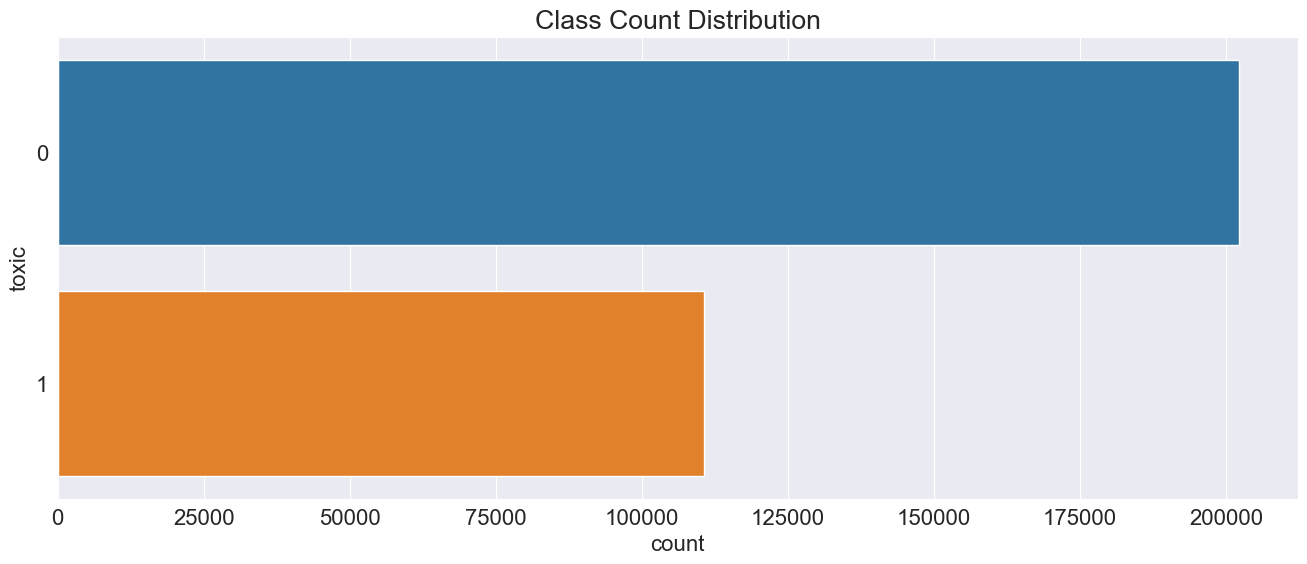

In [14]:
sns.countplot(data=df,y='toxic')
plt.title("Class Count Distribution")
plt.show()

In [15]:
df['sentence_lengths'] = df['comment_text'].progress_apply(lambda x: len(x.split()))

100%|██████████| 312735/312735 [00:01<00:00, 298010.08it/s]


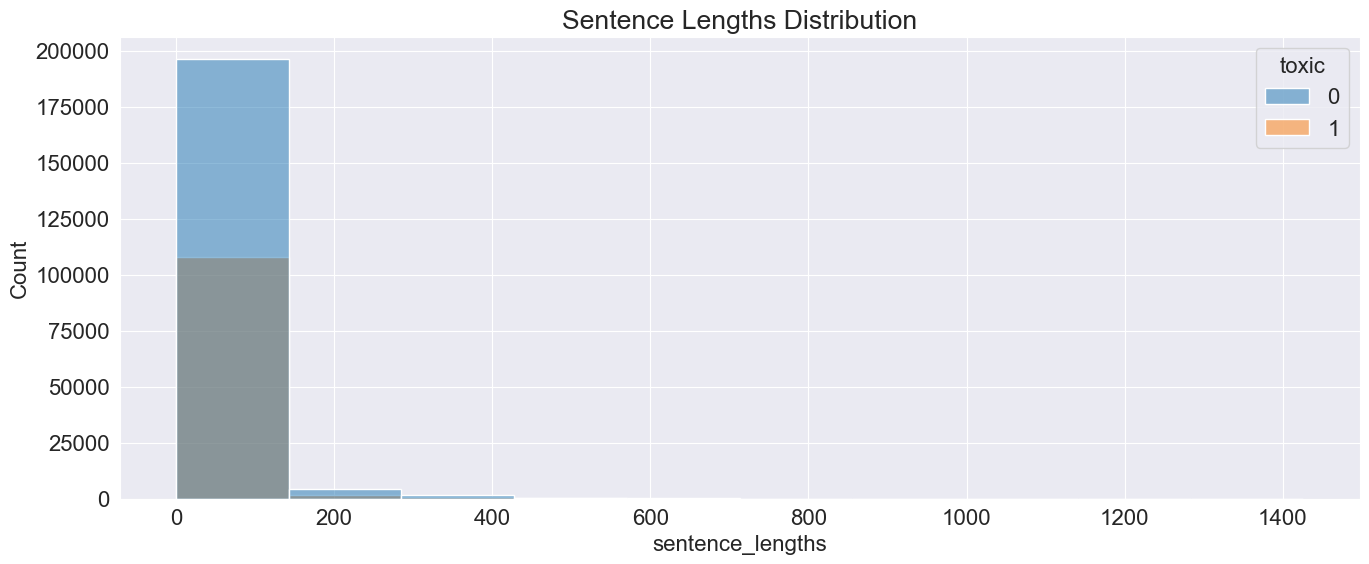

In [16]:
sns.histplot(data=df,x='sentence_lengths',hue='toxic',bins=10, element='bars')
plt.title("Sentence Lengths Distribution")
plt.show()


In [17]:
df["sentence_lengths"].describe()

count    312735.000000
mean         28.739757
std          49.602794
min           0.000000
25%           6.000000
50%          14.000000
75%          31.000000
max        1426.000000
Name: sentence_lengths, dtype: float64

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['toxic_encoded'] = le.fit_transform(df['toxic'])

ModuleNotFoundError: No module named 'sklearn'

In [19]:
df.to_json("data_pp.json", orient="columns")

In [ ]:
df_sample = df.sample(frac=0.25, ignore_index=True)
df_sample.reset_index(drop=True, inplace=True)
df_sample.to_json("data_pp_sample.json")